<strong>ARIMA (AutoRegressive Integrated Moving Average)</strong> is a method used in time series forecasting and involves three different procedures:
- Differencing the time series to reach "stationarity" (thus "integrated")
- Determining relevant past steps to predict the next time step ("autoregression")
- Determining ("moving average")

In [1]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from pmdarima.datasets import load_airpassengers
%matplotlib inline

In [2]:
# Import dataset
s = load_airpassengers(as_series=True)
dti = pd.date_range('1949-01-01', periods=s.shape[0], freq='M')
df = pd.DataFrame({'date': dti, 'passengers': s})
df.head()

,date,passengers
0,1949-01-31,112.0
1,1949-02-28,118.0
2,1949-03-31,132.0
3,1949-04-30,129.0
4,1949-05-31,121.0


/Users/sbcmac080/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


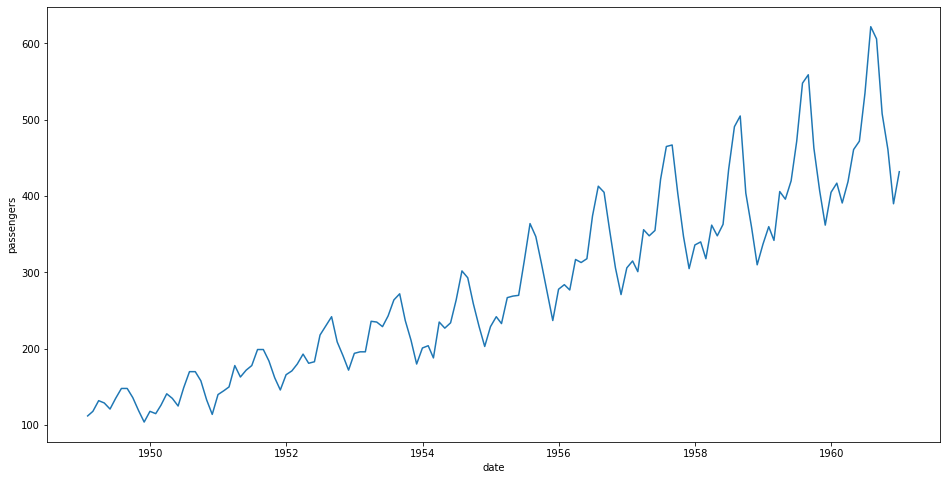

In [3]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='passengers', data=df)

We use the Box & Jenkins airline data, which records monthly totals of international airline passengers from 1949 to 1960.

## 0) Time series properties

A time series has several properties:
- <strong>level:</strong> the actual value of the time series
- <strong>trend:</strong> a tendency of the series to increase of decrease over time
- <strong>seasonality:</strong> change in the time series that occurs following regular time periods
- <strong>noise/error:</strong> the irregularities that arise from randomness and unforeseen events explaining potential outliers
- <strong>cycles:</strong> change in the time series that occurs with irregular time periods unlike seasonality (e.g. market)

We can decompose the time series into several of the above properties provided we specify values that we already know, such as the most plausible period the series follows (e.g. 12 months in a year), as well as whether the seasonality is "additive" or "multiplicative".<br><br>
The seasonality is additive if the level seems to behave independently from the trend, i.e. if the amplitude of the seasonality does not change even if the trend increases. The seasonality is multiplicative if the amplitude of the seasonality seems to behave proportionally to the trend. We observe a multiplicative seasonality in the series above considering the amplitude increases with th trend.<br><br>(Here is a great resource to visualize additive/multiplicative seasonality:<br> https://kourentzes.com/forecasting/2014/11/09/additive-and-multiplicative-seasonality/)

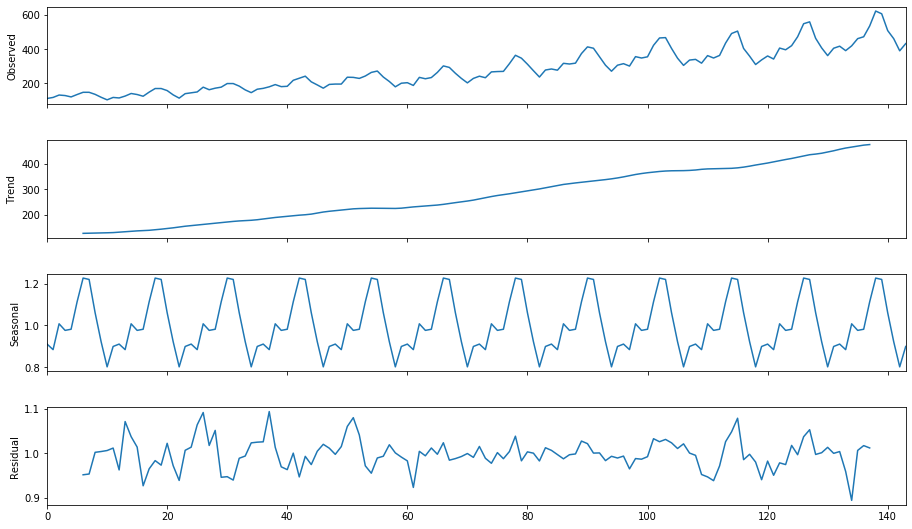

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['passengers'], model='multiplicative', freq=12)
fig = result.plot()
fig.set_size_inches(14, 8)

<u>Note</u>: Considering cyclic components other than seasonality are not obvious, we cannot extract them easily from the time series in the above decomposition.

## 1) Stationarity and differencing (AR\[I\]MA)

<strong>stationarity:</strong> A time series is stationary when its mean, variance and autocorrelation are all constant over time. <br><br>
Time series forecasting is based on the assumption that future values will reflect past values, and most methods therefore rely on stationarity of a given series. The first step in ARIMA requires us to identify whether the time series is stationary and if not, to transform it until it becomes stationary. This process is called "differencing".

### 1.1) Checking stationarity

One way to check stationarity is to do it done visually.

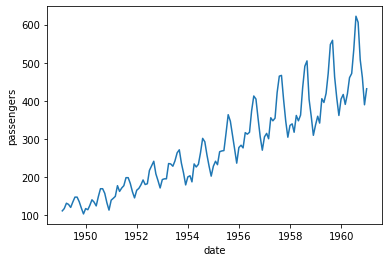

In [5]:
sns.lineplot(x='date', y='passengers', data=df)

The above plot suggests the mean and the variance increase over time so the time series is not stationary.

In [6]:
from statsmodels.tsa.stattools import adfuller


### 1.2) Differencing

## 2) Partial autocorrelation and autoregression (\[AR\]IMA)

## 3) Autocorrelation and Moving average (ARI\[MA\])

In [7]:
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

from pmdarima.datasets import load_airpassengers

%matplotlib inline

In [8]:
# Import dataset
s = load_airpassengers(as_series=True)
dti = pd.date_range('1949-01-01', periods=s.shape[0], freq='M')
df = pd.DataFrame({'date': dti, 'passengers': s})
df.head()

,date,passengers
0,1949-01-31,112.0
1,1949-02-28,118.0
2,1949-03-31,132.0
3,1949-04-30,129.0
4,1949-05-31,121.0


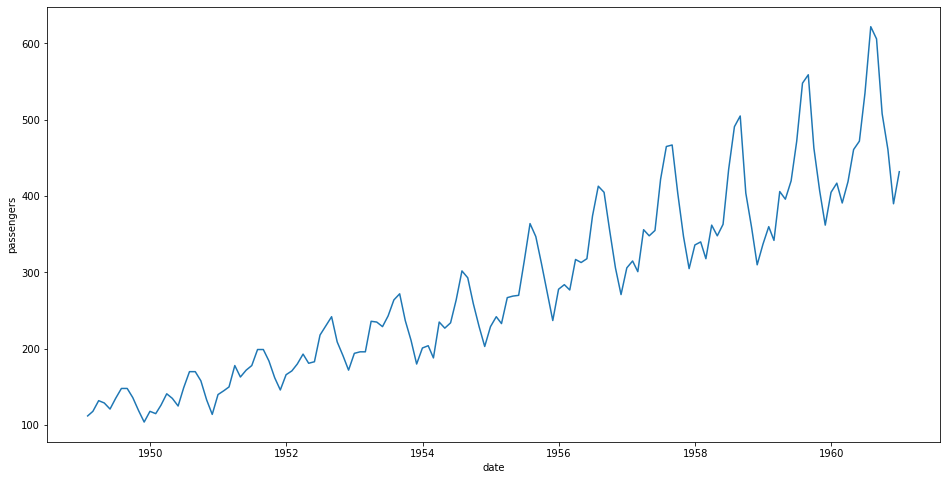

In [9]:
plt.figure(figsize=(16,8))
sns.lineplot(x='date', y='passengers', data=df)